
# ML assignment

In [3]:
#Import pandas library and load the data 
import pandas as pd

In [4]:
passengers = pd.read_csv('../data/titanic.csv')
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
passengers = passengers.set_index('PassengerId')
#Begin with basic data exploration
passengers.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Question 1

Read the dataset correctly using pandas, using an appropriate column as index. What is the PassengerId of "Mr. Robert William Norman"?

In [6]:
#locate the index with .index method and access the first value of the tuple

print("The Passenger ID of 'Mr. Robert William Norman' is: " +
      str(passengers.loc[passengers['Name'] == 'Mr. Robert William Norman'].index.values[0]) + 
      ".")

The Passenger ID of 'Mr. Robert William Norman' is: 235.


### Question 2

Compute the percentage of survivors out of total number of passengers and the percentage of men and women out of total number of passengers. Paste the answers below.

In [7]:
# percentage of survivors out of total number of passengers

print(f'{round(len(passengers.loc[passengers["Survived"] == 1])*100/len(passengers),2)}% of passengers survived.')

38.38% of passengers survived.


In [8]:
# percentage of men and women out of total passengers

print(f'{round(len(passengers.loc[passengers["Sex"] == "male"])*100/len(passengers),2)}% of passengers are male.')
print(f'{round(len(passengers.loc[passengers["Sex"] == "female"])*100/len(passengers),2)}% of passengers are female.')

64.76% of passengers are male.
35.24% of passengers are female.


### Question 3

Compute the percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived) and the sex distribution of survivors (i.e. percentage of survivors that were men and percentage of survivors that were women). Paste the answers below.

In [9]:
#Apply the two filters to find male/female who survived and divide by the total number of the respective sex

male_and_survived = len(passengers.loc[
    (passengers["Sex"] == "male") & (passengers["Survived"] == True)])*100/len(passengers.loc[
    (passengers["Sex"]=="male")])

female_and_survived = len(passengers.loc[
    (passengers["Sex"] == "female") & (passengers["Survived"] == True)])*100/len(passengers.loc[
    (passengers["Sex"]=="female")])

print(f'{round(male_and_survived, 2)}% of men survived and {round(female_and_survived, 2)}% of women survived.')

18.89% of men survived and 74.2% of women survived.


In [10]:
#Apply the two filters fto find male/female who survived and devide by the total number of passengers

survivors_male=len(passengers.loc[
    (passengers["Sex"] == "male") & (passengers["Survived"] == True)])*100/len(passengers)
survivors_female=len(passengers.loc[
    (passengers["Sex"] == "female") & (passengers["Survived"] == True)])*100/len(passengers)


print(f'{round(survivors_male *100/ (survivors_male + survivors_female),2)}% of the survivors are male.')
print(f'{round(survivors_female*100/ (survivors_male + survivors_female),2)}% of the survivors are female.')

31.87% of the survivors are male.
68.13% of the survivors are female.


### Question 4

Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving.

In [11]:
#results turned into stings with .astype in order to concatenate the "%" character in the result

round(passengers.pivot_table(index = 'Sex', columns = 'Survived', aggfunc = 'count', 
                       values = 'Name').div(len(passengers))*100, 2).rename(
    columns={0:'p(dying)',1:'p(surviving)'}).astype(str)+'%'

Survived,p(dying),p(surviving)
Sex,,
female,9.09%,26.15%
male,52.53%,12.23%


### Question 5

Display in a DataFrame the probability of survival/not survival of all combinations of sex and class.

In [12]:
#Using pivot table to create a two level dataframe with all possible combinations required

round(passengers.pivot_table(index = ['Sex', 'Pclass'], columns = 'Survived', aggfunc = 'count', 
                       values = 'Name').div(len(passengers))*100, 2).astype(str).rename(
                       columns={0:"P(dying)",1:"P(surviving)"})+'%'

Survived      P(dying) P(surviving)
Sex    Pclass                      
female 1         0.34%       10.21%
       2         0.67%        7.86%
       3         8.08%        8.08%
male   1         8.64%        5.05%
       2        10.21%        1.91%
       3        33.67%        5.27%

---

# Question 6 

1. Concerning Married vs Unmarried women:

    1a. Is there a difference in spending habits for married women Vs unmarried?
    
    1b. What was the probability for women to survive if they were married (Mrs.) Vs not (Miss)?

2. How many passengers from a lower class paid more than the minimum passenger from the next higherclass?
      If the event happens multiple times, what the reason?

3. Concerning age groups in tens of years:

    3a. Which age group had the highest probability of surviving?
    
    3b. What age group generated the highest revenue?

---

>General note: 
>the team decided to never modify the original passengers dataframe while answering the following questions. For each question a slimmer dataset was created merging the relevant fields from the original with additional ones. 
>The choice was made to never corrupt the original dataset as well as to work on nimbler df while processing.

### _Question 6a_:

    What was the average fare per class for married and unmarried women?
    What was the probability for women to survive if they were married (Mrs.) or not (Miss)?
    

In [ ]:
#Extract the relevant columns from the original dataset using .copy method

married_df = passengers[['Survived','Pclass','Name', 'Fare', 'Sex']].copy()

In [ ]:
#Add the "Title" and "Married woman" columns in order to answer
#Lambda function was used to transform the values in the columns
#Assigning the result of the lambda to the new column

married_df['Title'] = married_df['Name'].apply(
    lambda x: x.split('. ')[0] if x else '')
married_df['Married_woman'] = married_df['Title'].apply(
    lambda x: True if x == 'Mrs' else False)

married_df.head()

In [ ]:
#Calculate the percentage of married women among the three different classes

round((married_df[married_df['Sex'] == 'female'].pivot_table(
    index='Married_woman', columns = 'Pclass', aggfunc = 'count', values = [
        'Name'])*100).div(
    len(married_df[married_df['Sex'] == 'female'])),2).astype(str)+'%'

In [ ]:
#Calculate the average fare paid by married women vs unmarried 
#in the three different classes
#plot the total revenue for each class
revenue_married=round(married_df[married_df['Sex'] == 'female'].pivot_table(
    index='Married_woman', columns = 'Pclass', aggfunc = 'mean', values = 'Fare'),2)
revenue_married.plot(kind="bar", colormap="winter", ylabel="Revenue")

#### Insight on Revenue
>The total revenue generated by unmarried women is higher compared to married women.
>Similarly, for Class 1 the unmarried group generates more revenue. Interestingly though, the relationship is inverse for the other two classes (2,3) where the married group spends more. 

In [ ]:
#Calculate the probability of surviving for women given being married or not
#calculated among the total count of women. 

women_surviving=round((married_df[married_df['Sex'] == 'female'].pivot_table(
    index='Married_woman', columns = 'Survived', aggfunc = [
        'count'], values = 'Fare')*100).div(
    len(married_df[married_df['Sex'] == 'female'])),2).rename(
    columns={0:"P(dying)",1:"P(surviving)"})

women_surviving.astype(str)+"%"

In [ ]:
#Calculate the odds of surviving for women both married and not
odds_suviving=[women_surviving.iloc[1,1]/(women_surviving.iloc[1,0]),(
               women_surviving.iloc[0,1]/(women_surviving.iloc[0,0]))]

#Calculate the odds ratio to obtain insights
print('Being married for women increases the odds of surviving compared to being '+
 f'unmarried by {round((odds_suviving[0]/odds_suviving[1]-1)*100,2)}%')

### Conclusion

#### Probability of Surviving

- 43% of the total women survived and were unmarried while 32% survived and were married.
- 17% of the women died and were unmarried while 8% died and were married.
- The team can conclude how being married increase 56% the odds of surving for women.

---

### _Question 6b_: 
    How many passengers from a lower class paid more than the median passenger from the next higherclass?

In [ ]:
#Define a fucntion to check if a passenger payed more than the median of a given class

def passengers_paid_median(Pclass):
    class_ticket_price = passengers.loc[
                                      (passengers["Pclass"] == Pclass)
                                      ]
    return class_ticket_price["Fare"].median()

In [ ]:
#Apply the function to compare class 2 to 1 and class 3 to 2, other combinations
#don't make sense

for ClassNo in range(2,4):
    print (f"The number of passengers from class " + str(
        ClassNo) +" who paid more than the median of passengers from class "+ str(
    ClassNo-1)+":" + " " + str(passengers[(passengers["Pclass"]==ClassNo) & (
    passengers["Fare"]>passengers_paid_median(ClassNo-1))]["Survived"].count()))

>The results from the previous analysis show how there is a consistent number of people paying more than the median, so we asked ourselves why. A possible reason would be how prices of tickets change depending on the embarking ports. It is important to remember how the embark sequence is S-Q-C located in England (Southhampton, Cherbourg and Queenstown).

<AxesSubplot:title={'center':'Ticket Prices'}, xlabel='Embarked'>

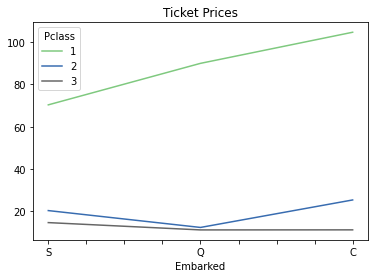

In [21]:
#Create a "Fares" dataframe grouping from the original dataset the total revenue per port 
#and the count of people per class. 
#Also, calculate the average price per ticket and add a column.
fares=round(passengers.pivot_table(
    index = ['Embarked','Pclass'], aggfunc ={'Fare':'sum', 'Pclass':'count'}
    ), 2).sort_values(
    by=['Fare'], ascending = False).rename(columns={
    'Pclass':'People per class', "Fare":"Revenue per port"})
fares['Ticket Prices']=round(fares['Revenue per port'].div(fares['People per class']),2)

#Unstack the multilevel dataframe for visualization purposes and easier handling
#Sort by order or embarkment 
#Insert a new Revenue per port column grouping by port and summing the fares as revenue
fares=fares.unstack().sort_index(ascending=False)
fares['Total Revenue per port']=round(passengers.groupby('Embarked').sum()['Fare'],2)

#plot the result for visualization
fares["Ticket Prices"].plot(kind="line",colormap="Accent", title="Ticket Prices")

<AxesSubplot:title={'center':'Revenue per port'}, xlabel='Embarked'>

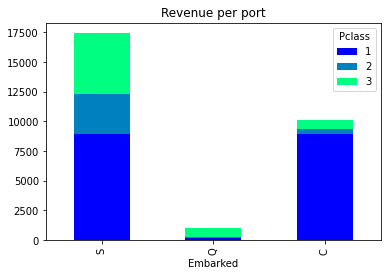

In [22]:
#Additional insights from the visualization of Revenue per port
fares["Revenue per port"].plot.bar(colormap="winter",title="Revenue per port", stacked=True)

#### Additional Insight on Revenue per port
>Lastly, the team reports how Southampton was by far the port generating the most revenue with Cherbourg having comparable results for First Class only and Q being further back in this metric.

### Conclusions 

#### Investigating the reasons

- Price of Tickets for First Class were increasing.
- Price of Tickets Second class decreased from Southampton to Q, only to increase again.
- Price of Tickets for Third class had a decreasing trend. 

=> This difference in trend explains the result since the team used the median as a metric.


---

### Question 6c: Age Groups: Revenue and P(surviving)
    1. Which age group had the highest probability of survivng?
    2. What age group generated the highest revenue?

In [23]:
#Data exploration : are there null values for Age?
passengers["Age"].isna().sum()

177

#### 2.Additional Insights
>Lastly, the team reports how the Unknwon category is very significant (177 records missing the "Age" feature), ultimatly reserving to consider how these would affect the above conclusions. 

In [24]:
#Creating the dataframe to answer the question

#Extract the relevant columns from the original dataset using .copy method
merged_passengers=passengers[['Survived','Fare', 'Sex','Pclass']].copy()

#Creating the bin limits and the names of the columns for each bin,
#storing them in two variables for easy hanfdling
bin_limits=[0,10,20,30,40,50,60,70,80,90]
bin_list=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90"]

#Applying the bins to "Age" in the original dataframe through .cut and storing the result
# as a new column in anither dataframe
merged_passengers["Age_Group"]=pd.cut(
    passengers["Age"],bins=bin_limits,labels=bin_list,right=False)

#Clean the data by adding a new field "Unknown" 
#for those passengers without an age specified
merged_passengers["Age_Group"]=merged_passengers[
    "Age_Group"].cat.add_categories("Unknown").fillna("Unknown")

#Visualize the head od the dataframe
merged_passengers.head()

,Survived,Fare,Sex,Pclass,Age_Group
PassengerId,,,,,
1,0,7.2500,male,3,20-30
2,1,71.2833,female,1,30-40
3,1,7.9250,female,3,20-30
4,1,53.1000,female,1,30-40
5,0,8.0500,male,3,30-40


In [25]:
#Calculate the Probability of Surviving Within Class,
#store it as a column of a dataframe for easy plotting later
p_surv_age=round((merged_passengers.loc[
    (merged_passengers["Survived"]==True)].groupby(["Age_Group","Pclass"]).agg("count")*100).div(
    merged_passengers.groupby(["Age_Group","Pclass"]).agg({
    "Survived":"count"})),2)[["Survived"]].rename(
    columns={"Survived":"Probability of Surviving within Class"}).unstack()
p_surv_age

Probability of Surviving within Class               
Pclass                                        1       2      3
Age_Group                                                     
0-10                                      66.67  100.00  45.24
10-20                                     83.33   50.00  25.76
20-30                                     70.59   41.51  23.31
30-40                                     78.00   39.58  21.74
40-50                                     59.46   55.56   5.88
50-60                                     55.56   33.33   0.00
60-70                                     30.77   33.33  33.33
70-80                                      0.00    0.00   0.00
80-90                                    100.00     NaN    NaN
Unknown                                   46.67   36.36  25.00

In [26]:
#Calculate the Probability of Surviving Over Total,
#store it as a column of a dataframe for easy plotting later
p_surv_age['p(surv over total)']= round((merged_passengers.loc[
    (merged_passengers["Survived"]==True)].groupby("Age_Group").agg("count")*100).div(
        len(merged_passengers.loc[
            (merged_passengers["Survived"]==True)])),1)[["Survived"]]
p_surv_age

Probability of Surviving within Class                 \
Pclass                                        1       2      3   
Age_Group                                                        
0-10                                      66.67  100.00  45.24   
10-20                                     83.33   50.00  25.76   
20-30                                     70.59   41.51  23.31   
30-40                                     78.00   39.58  21.74   
40-50                                     59.46   55.56   5.88   
50-60                                     55.56   33.33   0.00   
60-70                                     30.77   33.33  33.33   
70-80                                      0.00    0.00   0.00   
80-90                                    100.00     NaN    NaN   
Unknown                                   46.67   36.36  25.00   

          p(surv over total)  
Pclass                        
Age_Group                     
0-10                    11.1  
10-20                   12.0  
20-30                   22.5  
30-40                   21.3  
40-50                    9.9  
50-60                    5.8  
60-70                    1.8  
70-80                    0.0  
80-90                    0.3  
Unknown                 15.2

<AxesSubplot:ylabel='p(surv over total)'>

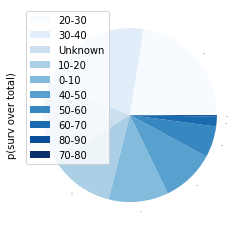

In [27]:
#Plot Probability of Surviving Over Total as a pie chart
p_surv_age.sort_values('p(surv over total)', ascending=False).plot(
    kind="pie",y='p(surv over total)',fontsize=0, colormap='Blues')

<AxesSubplot:title={'center':'Probability of Surviving within Class'}, xlabel='Age_Group'>

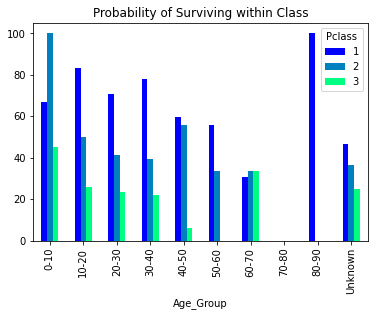

In [28]:
## Plot Probability of Surviving Within Class as a bar chart
p_surv_age["Probability of Surviving within Class"].plot.bar(
    title="Probability of Surviving within Class", colormap="winter")

In [29]:
#Calculate the Revenue per Age Group,
#store it as a column of a dataframe for easy plotting later
revenue_df=round(merged_passengers.pivot_table(
    index="Age_Group",aggfunc="sum",values="Fare"),2).rename(
    columns={"Fare":"Revenue per Age Group"})

#Calculate the Revenue per person,
#store it as a column of a dataframe for easy plotting later
revenue_df["Revenue per person"]=round(merged_passengers.pivot_table(
    index="Age_Group",aggfunc="sum",values="Fare").div(
    merged_passengers.pivot_table(
        index="Age_Group",aggfunc="count",values="Fare")),2)

#Calculate the Percentage of Revenue over total,
#store it as a column of a dataframe for easy plotting later
revenue_df=revenue_df.join(
round(merged_passengers.pivot_table(
    index="Age_Group",aggfunc="sum",values="Fare").div(
    merged_passengers["Fare"].sum())*100,2).rename(
    columns={"Fare":"Percentage of Revenue over total"}))

<AxesSubplot:ylabel='Percentage of Revenue over total'>

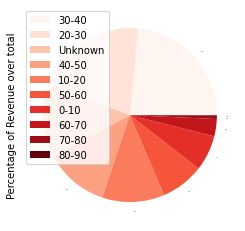

In [30]:
#Plot Percentage of Revenue over total as a pie chart
revenue_df.sort_values("Percentage of Revenue over total", ascending=False).plot(
    kind="pie",y="Percentage of Revenue over total",fontsize=0,colormap='Reds')

<AxesSubplot:>

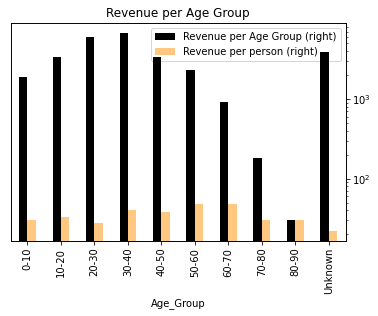

In [31]:
#Plot Revenue per Age Group and Revenue per person as a bar chart, 
#because of differnece in scale Revenue per Age Group has been rescaled through log10
revenue_df[["Revenue per Age Group","Revenue per person"]].plot.bar(
    title="Revenue per Age Group", colormap='copper', logy=True, secondary_y=True)

#### Additional Insights on Revenue
>The Group generating the most revenue is 30-40, closely followed by 40-50 and 20-30.
>Relevant to see how, exclusing the Unknown, the distribution of binned revenue seems to follow a Normal Distribution, although a little skewed. 
>It also interesting to see how the highest average revenue per person belongs to the older groups (50-60 and 60-70), indicating a higher willingness to spend per capita in such groups. 


### Conclusions

#### Which age group had the highest probability of surviving?

- The highest probability of surviving within the Age Group always matches people in the First Class except for Age Groups (0-10) and (60-70)
- The highest probability of surviving over the total survivors belongs to Age Groups (20-30) and (30-40)